# TOPIC : WALMART STORES SALES FORCASTING!


PROBLEM STATEMENT : Predicting sales in stores during festive season (Super Bowl, Labour Day, Thanksgiving, Christmas) based on departments and Markdowns (1-5).  And, affect of unemployment rate on sales.


In [31]:
import pandas as pd
import seaborn as sns
import numpy 
import matplotlib.pyplot as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [32]:
print("Reading features data...")
data_features=pd.read_csv('features.csv')
data_features.head()

Reading features data...


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [33]:
print("Reading train data...")
data_train=pd.read_csv('train.csv')
data_train.head()

Reading train data...


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [34]:
print("Reading  test data...")
data_test=pd.read_csv('test.csv')
data_test.head()

Reading  test data...


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [35]:
##concatinatin train and test data
df_all = pd.concat((data_train, data_test), axis=0, ignore_index=True)
print("Reading data...completed")


Reading data...completed


In [36]:
##fixing date format
df_all['Date'] = pd.to_datetime(df_all['Date'], format='%Y-%m-%d')
data_features['Date'] = pd.to_datetime(data_features['Date'], format='%Y-%m-%d')

# working on CPI

Summary : The CPI i.e. Customer Price Index column has null values.The Nan values are replaced by first -1. A graph is plotted that shows the Number of null values and not null values in CPI column i.e. 0 : Count of null Values, 1 : Count of not null Values. Since the graph shows that the null values are very less in number when compared to the not null values, we consider the filling of null values with average of CPI calculated.

In [37]:
##filling Nan values with -1
data_features['CPI'].fillna(-1, inplace = True)
##calculating number of null values
nullCPI = data_features['CPI'] != -1
nullCPIvalues=sum(data_features['CPI']== -1)
print nullCPIvalues
notnullCPIvalues=sum(data_features['CPI']!= -1)
print notnullCPIvalues

585
7605


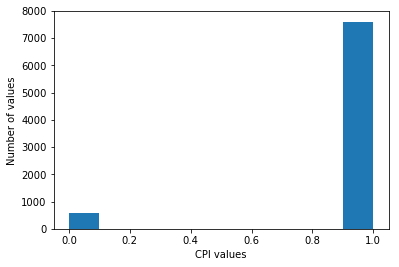

In [38]:
##graph to check number of null values and number of not null values
plt.hist(nullCPI,range=(0,1))
plt.xlabel('CPI values')
plt.ylabel('Number of values')
plt.show() 

In [39]:
##calculating mean of CPI 
average_CPI=data_features.CPI.sum()/data_features.shape[0]
average_CPI

160.07075138399216

In [40]:
#replacing null values(i.e -1) by mean
data_features.CPI.replace(-1, average_CPI, inplace=True)
data_features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,160.070751,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,160.070751,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,160.070751,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,160.070751,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,160.070751,NaN,False


# working on unemployment

Summary : The unemployment column consists of Nan values.The Nan values are replaced by first -1. A graph is plotted that shows the freequency of Nan values and not null values in employment column i.e. 0 : Count of Nan Values, 1 : Count of not null Values. Since the graph shows that the Nan values are very less in count when compared to the not null values, we consider the filling of Nan values with mean.

In [41]:
##Replacing Nan values with -1
data_features['Unemployment'].fillna(-1, inplace = True)
##Total number of Nan values
nullUnemployment = data_features['Unemployment'] != -1
null_values=sum(data_features['Unemployment'] == -1)
notnull_values=sum(data_features['Unemployment'] != -1)
print null_values
print notnull_values

585
7605


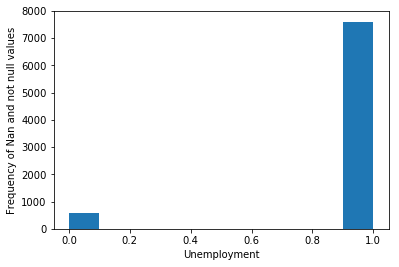

In [42]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullUnemployment,range=(0,1))
plt.xlabel('Unemployment')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

In [43]:
##Calculation of mean of Unemployment
mean_Unemployment=data_features.Unemployment.mean()
mean_Unemployment

7.196333821733864

In [44]:
##Replacing the -1 values with the mean of Unemployment
data_features.Unemployment.replace(-1, mean_Unemployment, inplace=True)
data_features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,160.070751,7.196334,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,160.070751,7.196334,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,160.070751,7.196334,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,160.070751,7.196334,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,160.070751,7.196334,False


In [45]:
##Replacing Nan values with -1
data_features['Unemployment'].fillna(-1, inplace = True)
##Total number of Nan values
nullUnemployment = data_features['Unemployment'] != -1

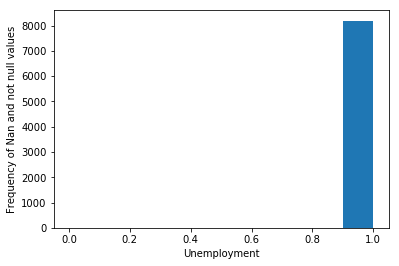

In [46]:
##Graph after replacement of Nan values
not_null_Unemployment= data_features['Unemployment'] != -1
plt.hist(not_null_Unemployment,range=(0,1))
plt.xlabel('Unemployment')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

# working on markdown 1

Summary: We are using year wise data from features to fill the Markdown 1 values with appropriate values (that is, average mean or -1) inplace of NaN .


In [47]:
#2010 records
users_2010 = data_features[data_features['Date'] >= '2010-01-01']
users_2010 = users_2010[users_2010['Date'] <= '2010-12-31']
users_2010
#2011 records
users_2011 = data_features[data_features['Date'] >= '2011-01-01']
users_2011 = users_2011[users_2011['Date'] <= '2011-12-31']
users_2011
#2012 records
users_2012 = data_features[data_features['Date'] >= '2012-01-01']
users_2012 = users_2012[users_2012['Date'] <= '2012-12-31']
users_2012
#2013 records
users_2013 = data_features[data_features['Date'] >= '2013-01-01']
users_2013 = users_2013[users_2013['Date'] <= '2013-12-31']
users_2013

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
152,1,2013-01-04,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525000,False
153,1,2013-01-11,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525000,False
154,1,2013-01-18,42.92,3.237,3772.69,3559.46,3.88,246.62,1900.40,224.235813,6.525000,False
155,1,2013-01-25,53.37,3.227,965.89,1097.91,0.10,225.36,1831.88,224.235552,6.525000,False
156,1,2013-02-01,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,6.525000,False
157,1,2013-02-08,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525000,True
158,1,2013-02-15,49.66,3.475,72937.29,6665.52,47.21,13014.67,6310.18,224.276053,6.525000,False
159,1,2013-02-22,50.25,3.597,20107.75,3163.89,42.20,15657.30,5812.86,224.420289,6.525000,False
160,1,2013-03-01,48.01,3.711,10610.74,261.46,2.80,25.54,2747.59,224.564526,6.525000,False
161,1,2013-03-08,50.81,3.658,5000.58,290.46,78.77,606.15,3697.11,224.708763,6.525000,False


# For 2010 Data

In [48]:
##Replacing Nan values with -1
users_2011['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2011['MarkDown1'] != -1
null_values=sum(users_2011['MarkDown1'] == -1)
print null_values

1986


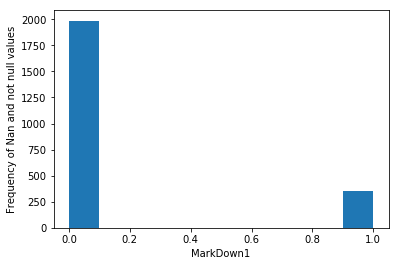

In [49]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

INFERENCE: We have very large null values in this part of our dataset , so we replaced null values with -1

# For 2011 data

In [50]:
##Replacing Nan values with -1
users_2011['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2011['MarkDown1'] != -1
null=sum(users_2011['MarkDown1'] == -1)
print null

1986


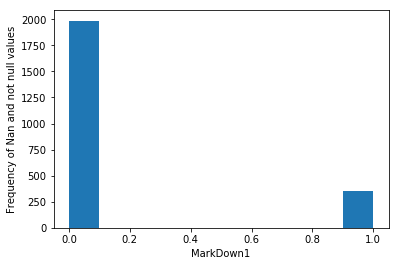

In [51]:

##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

INFERENCE: We have very large null values in this part of our dataset , so we replaced null values with -1

# For 2012 data

In [52]:
##Replacing Nan values with -1
users_2012['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2012['MarkDown1'] != -1
null=sum(users_2012['MarkDown1'] == -1)
print null

10


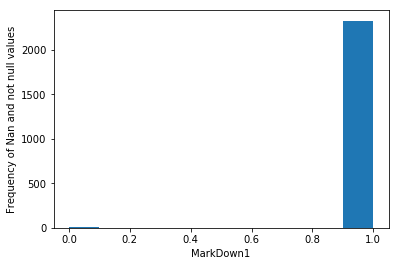

In [23]:

##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

In [24]:

##Calculation of mean of Unemployment
mean_MarkDown1=users_2012.MarkDown1.mean()
mean_MarkDown1

7024.287388888888

In [25]:

##Replacing the -1 values with the mean of Unemployment
users_2012.MarkDown1.replace(-1, mean_MarkDown1, inplace=True)
users_2012.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8155,45,2012-11-30,37.43,3.729,2298.55,NaN,2908.54,100.86,1344.84,192.304445,8.667,False
8156,45,2012-12-07,45.53,3.688,9273.32,NaN,263.41,1979.78,11324.83,192.325858,8.667,False
8157,45,2012-12-14,43.55,3.637,3217.12,NaN,74.00,40.26,1747.66,192.358548,8.667,False
8158,45,2012-12-21,43.54,3.577,4187.83,NaN,238.00,92.68,2977.33,192.458906,8.667,False
8159,45,2012-12-28,35.96,3.563,12751.77,24656.74,230.07,31.46,1654.14,192.559264,8.667,True


# For 2013 Data

In [26]:
##Replacing Nan values with -1
users_2013['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2013['MarkDown1'] != -1
null=sum(users_2013['MarkDown1'] == -1)
print null

2


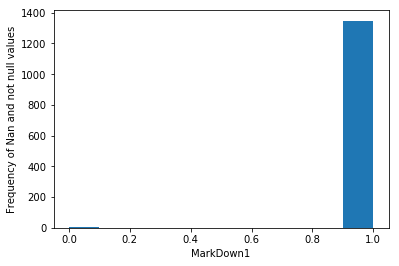

In [27]:

##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

In [28]:

##Calculation of mean of Unemployment
mean_MarkDown1=users_2013.MarkDown1.mean()
mean_MarkDown1

7697.142629629622

In [29]:
##Replacing the -1 values with the mean of Unemployment
users_2013.MarkDown1.replace(-1, mean_MarkDown1, inplace=True)
users_2013.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,160.070751,7.196334,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,160.070751,7.196334,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,160.070751,7.196334,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,160.070751,7.196334,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,160.070751,7.196334,False
